In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as plticker
import matplotlib.patches as mpatches
import matplotlib
from IPython.display import clear_output
import timeit

def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 22
matplotlib.rcParams['legend.fontsize'] = 22

def distance(p0, p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2 +(p0[2] - p1[2])**2  )

# Load up identities of residues involved in H bonding 

In [2]:
hbond_res = pd.read_csv('files/hbond_res_updated.csv')
len(hbond_res)

19

# Print out every item considered for this H bond analysis 

In [3]:
res_nums =[]
O_sele=[]
res_names=[]

for i, rew in hbond_res.iterrows():
    O_sele.append(hbond_res['O selection'].iloc[i].split('/'))
    res_nums.append(hbond_res['Number'].iloc[i])
    res_names.append(hbond_res['RESN'].iloc[i])
    
print("(reference['resname']=='OOO') | (reference['name']=='W1')| (reference['name']=='W2')|(reference['name']=='W3')| (reference['name']=='W4')|(reference['name']=='O1') & (reference['resname']=='OEC')|(reference['name']=='O2') & (reference['resname']=='OEC')|(reference['name']=='O3') & (reference['resname']=='OEC')|(reference['name']=='O4') & (reference['resname']=='OEC')|(reference['name']=='O5') & (reference['resname']=='OEC')|")

a = 0
ind = 0 
for x in (O_sele):
    for z in x:
        a=a+1
        print('(reference["name"]== "%s") & (reference["resname"]== "%s") & (reference["resseq"]== %s)|' %(z, res_names[ind], res_nums[ind]), end='')
    ind +=1

(reference['resname']=='OOO') | (reference['name']=='W1')| (reference['name']=='W2')|(reference['name']=='W3')| (reference['name']=='W4')|(reference['name']=='O1') & (reference['resname']=='OEC')|(reference['name']=='O2') & (reference['resname']=='OEC')|(reference['name']=='O3') & (reference['resname']=='OEC')|(reference['name']=='O4') & (reference['resname']=='OEC')|(reference['name']=='O5') & (reference['resname']=='OEC')|
(reference["name"]== "OG1") & (reference["resname"]== "THR") & (reference["resseq"]== 335)|(reference["name"]== "NH1") & (reference["resname"]== "ARG") & (reference["resseq"]== 334)|(reference["name"]== "NH2") & (reference["resname"]== "ARG") & (reference["resseq"]== 334)|(reference["name"]== "OE1") & (reference["resname"]== "GLU") & (reference["resseq"]== 65)|(reference["name"]== "OE2") & (reference["resname"]== "GLU") & (reference["resseq"]== 65)|(reference["name"]== "O") & (reference["resname"]== "PRO") & (reference["resseq"]== 340)|(reference["name"]== "OD1") &

#  Load up reference pdb

In [4]:
pdb_path =  'files/0F.pdb_fittedto55all.pdb'
colspecs_pdb = [(0, 6), (6, 11), (12, 16), (16, 17), (17, 20), (21, 22), (22, 26),
            (26, 27), (30, 38), (38, 46), (46, 54), (54, 60), (60, 66), (76, 78),
            (78, 80)]

names_pdb = ['ATOM', 'serial', 'name', 'altloc', 'resname', 'chainid', 'resseq',
         'icode', 'x', 'y', 'z', 'occupancy', 'tempfactor', 'element', 'charge']

reference = pd.read_fwf(pdb_path, names=names_pdb, colspecs=colspecs_pdb, skiprows=2)
reference

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
0,SCALE2,NaN,0.00,0,000,NaN,0.0,4.0,0.0000,0.000,0.000,0.00,NaN,NaN,NaN
1,SCALE3,NaN,0.00,0,000,NaN,0.0,0.0,0.0032,49.000,0.000,0.00,NaN,NaN,NaN
2,ATOM,1.0,N,NaN,ALA,A,11.0,NaN,106.3370,44.191,2.179,1.00,69.01,N,NaN
3,ATOM,2.0,CA,NaN,ALA,A,11.0,NaN,106.0880,42.756,2.074,1.00,72.88,C,NaN
4,ATOM,3.0,C,NaN,ALA,A,11.0,NaN,106.5650,42.034,3.331,1.00,72.00,C,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52254,HETATM,52213.0,O,NaN,HOH,S,1796.0,NaN,22.8300,59.185,-0.104,1.00,57.12,O,NaN
52255,HETATM,52214.0,O,NaN,HOH,S,1797.0,NaN,93.8550,74.540,19.748,0.98,61.32,O,NaN
52256,HETATM,52215.0,O,NaN,HOH,S,1798.0,NaN,21.8290,75.450,31.332,1.00,72.32,O,NaN
52257,HETATM,52216.0,O,NaN,HOH,S,1799.0,NaN,22.7870,-59.484,21.536,1.00,65.81,O,NaN


# Filter reference pdb

In [5]:
filtered_ref=reference[(reference['resname']=='OOO') | (reference['name']=='W1')| (reference['name']=='W2')|(reference['name']=='W3')| (reference['name']=='W4')|(reference['name']=='O1') & (reference['resname']=='OEC')|(reference['name']=='O2') & (reference['resname']=='OEC')|(reference['name']=='O3') & (reference['resname']=='OEC')|(reference['name']=='O4') & (reference['resname']=='OEC')|(reference['name']=='O5') & (reference['resname']=='OEC')|
(reference["name"]== "OG1") & (reference["resname"]== "THR") & (reference["resseq"]== 335)|(reference["name"]== "NH1") & (reference["resname"]== "ARG") & (reference["resseq"]== 334)|(reference["name"]== "NH2") & (reference["resname"]== "ARG") & (reference["resseq"]== 334)|(reference["name"]== "OE1") & (reference["resname"]== "GLU") & (reference["resseq"]== 65)|(reference["name"]== "OE2") & (reference["resname"]== "GLU") & (reference["resseq"]== 65)|(reference["name"]== "O") & (reference["resname"]== "PRO") & (reference["resseq"]== 340)|(reference["name"]== "OD1") & (reference["resname"]== "ASP") & (reference["resseq"]== 61)|(reference["name"]== "OD2") & (reference["resname"]== "ASP") & (reference["resseq"]== 61)|(reference["name"]== "O") & (reference["resname"]== "ASP") & (reference["resseq"]== 61)|(reference["name"]== "ND2") & (reference["resname"]== "ASN") & (reference["resseq"]== 181)|(reference["name"]== "OD1") & (reference["resname"]== "ASN") & (reference["resseq"]== 181)|(reference["name"]== "O") & (reference["resname"]== "ASN") & (reference["resseq"]== 181)|(reference["name"]== "O") & (reference["resname"]== "GLY") & (reference["resseq"]== 171)|(reference["name"]== "O") & (reference["resname"]== "SER") & (reference["resseq"]== 169)|(reference["name"]== "OG") & (reference["resname"]== "SER") & (reference["resseq"]== 169)|(reference["name"]== "OE1") & (reference["resname"]== "GLU") & (reference["resseq"]== 312)|(reference["name"]== "OE2") & (reference["resname"]== "GLU") & (reference["resseq"]== 312)|(reference["name"]== "NZ") & (reference["resname"]== "LYS") & (reference["resseq"]== 317)|(reference["name"]== "ND2") & (reference["resname"]== "ASN") & (reference["resseq"]== 350)|(reference["name"]== "OD1") & (reference["resname"]== "ASN") & (reference["resseq"]== 350)|(reference["name"]== "O") & (reference["resname"]== "ASN") & (reference["resseq"]== 350)|(reference["name"]== "OD1") & (reference["resname"]== "ASN") & (reference["resseq"]== 338)|(reference["name"]== "ND2") & (reference["resname"]== "ASN") & (reference["resseq"]== 338)|(reference["name"]== "O") & (reference["resname"]== "ASN") & (reference["resseq"]== 338)|(reference["name"]== "OD1") & (reference["resname"]== "ASN") & (reference["resseq"]== 155)|(reference["name"]== "ND2") & (reference["resname"]== "ASN") & (reference["resseq"]== 155)|(reference["name"]== "O") & (reference["resname"]== "ASN") & (reference["resseq"]== 155)|(reference["name"]== "O") & (reference["resname"]== "ASN") & (reference["resseq"]== 335)|(reference["name"]== "N") & (reference["resname"]== "ASN") & (reference["resseq"]== 335)|(reference["name"]== "HG1") & (reference["resname"]== "PRO") & (reference["resseq"]== 334)|(reference["name"]== "HG2") & (reference["resname"]== "PRO") & (reference["resseq"]== 334)|(reference["name"]== "HD1") & (reference["resname"]== "PRO") & (reference["resseq"]== 334)|(reference["name"]== "HD2") & (reference["resname"]== "PRO") & (reference["resseq"]== 334)|(reference["name"]== "O") & (reference["resname"]== "LEU") & (reference["resseq"]== 337)|(reference["name"]== "HZ1") & (reference["resname"]== "LYS") & (reference["resseq"]== 339)|(reference["name"]== "HZ2") & (reference["resname"]== "LYS") & (reference["resseq"]== 339)|(reference["name"]== "HZ3") & (reference["resname"]== "LYS") & (reference["resseq"]== 339)|(reference["name"]== "OD1") & (reference["resname"]== "ASP") & (reference["resseq"]== 96)|(reference["name"]== "OD2") & (reference["resname"]== "ASP") & (reference["resseq"]== 96)|(reference["name"]== "HA1") & (reference["resname"]== "GLY") & (reference["resseq"]== 333)|(reference["name"]== "HA2") & (reference["resname"]== "GLY") & (reference["resseq"]== 333)]
filtered_ref.head()

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
402,ATOM,401.0,O,NaN,ASP,A,61.0,NaN,86.816,29.930,55.981,1.0,21.81,O,NaN
405,ATOM,404.0,OD1,NaN,ASP,A,61.0,NaN,83.835,32.610,53.862,1.0,22.22,O,NaN
406,ATOM,405.0,OD2,NaN,ASP,A,61.0,NaN,82.080,31.487,54.582,1.0,27.61,O,1-
437,ATOM,436.0,OE1,NaN,GLU,A,65.0,NaN,79.830,25.901,57.983,1.0,27.32,O,NaN
438,ATOM,437.0,OE2,NaN,GLU,A,65.0,NaN,78.862,26.619,56.163,1.0,35.43,O,1-


# pickle

In [6]:
filtered_ref.to_pickle('files/xtal_waters_refposition.pkl')

# Next, load up average oxygen density positions

In [7]:
colspecs_pdb = [(0, 6), (6, 11), (12, 16), (16, 17), (17, 20), (21, 22), (22, 26),
            (26, 27), (30, 38), (38, 46), (46, 54), (54, 60), (60, 66), (76, 78),
            (78, 80)]
names_pdb = ['ATOM', 'serial', 'name', 'altloc', 'resname', 'chainid', 'resseq',
         'icode', 'x', 'y', 'z', 'occupancy', 'tempfactor', 'element', 'charge']

pdb_path1 = 'files/peaks_OW_8_29_2022_abs_final.pdb' 
pdb = pd.read_fwf(pdb_path1, names=names_pdb, colspecs=colspecs_pdb,skiprows=4)
pdb

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
0,ATOM,4719.0,O,NaN,HOH,X,1.0,NaN,27.991,210.851,25.077,10.62,10.62,O,NaN
1,ATOM,10301.0,O,NaN,HOH,X,2.0,NaN,26.168,181.815,59.512,10.19,10.19,O,NaN
2,ATOM,1340.0,O,NaN,HOH,X,3.0,NaN,63.183,193.515,7.388,10.13,10.13,O,NaN
3,ATOM,4218.0,O,NaN,HOH,X,4.0,NaN,28.620,206.759,22.663,10.11,10.11,O,NaN
4,ATOM,11681.0,O,NaN,HOH,X,5.0,NaN,37.867,133.321,68.778,10.06,10.06,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13121,ATOM,1107.0,O,NaN,HOH,Y,3123.0,NaN,67.678,24.469,6.633,2.55,2.55,O,NaN
13122,ATOM,2716.0,O,NaN,HOH,Y,3124.0,NaN,101.439,67.672,14.924,2.55,2.55,O,NaN
13123,ATOM,12569.0,O,NaN,HOH,Y,3125.0,NaN,68.157,165.876,74.097,2.55,2.55,O,NaN
13124,ATOM,2353.0,O,NaN,HOH,Y,3126.0,NaN,112.484,85.686,13.082,2.55,2.55,O,NaN


# Loop through and find the average oxygen peak which is closest to each reference water/residue

In [8]:
dist = 1.5  # Assume I can find a peak within 1.5 Angstrom of each chain G water
for i, row in filtered_ref.iterrows():
    point1= [float(filtered_ref.loc[i,'x']),float(filtered_ref.loc[i,'y']),float(filtered_ref.loc[i,'z'])] 
    filtered_ref.loc[i,'OW_ID'] = 0 
    
    for q,raw in pdb.iterrows():
        point2= [float(pdb.loc[q,'x']),float(pdb.loc[q,'y']),float(pdb.loc[q,'z'])] 
        if (distance(point1,point2) < dist) :
            #replace position in reference dataframe 
            filtered_ref.loc[i,'x'] = pdb.loc[q,'x']
            filtered_ref.loc[i,'y'] = pdb.loc[q,'y']
            filtered_ref.loc[i,'z'] = pdb.loc[q,'z']
            filtered_ref.loc[i,'OW_ID'] = pdb.loc[q,'resseq'] 
            filtered_ref.loc[i,'OW_chain'] = pdb.loc[q,'chainid'] 

            break 

/Users/yyk_lab/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/yyk_lab/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
filtered_ref.to_pickle('files/Waters_Odensity_xtalposition.pkl')
finalgro = pd.read_pickle('files/Waters_Odensity_xtalposition.pkl')
finalgro

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge,OW_ID,OW_chain
402,ATOM,401.0,O,NaN,ASP,A,61.0,NaN,86.963,29.761,55.976,1.0,21.81,O,NaN,1226.0,X
405,ATOM,404.0,OD1,NaN,ASP,A,61.0,NaN,83.786,32.575,53.833,1.0,22.22,O,NaN,1663.0,X
406,ATOM,405.0,OD2,NaN,ASP,A,61.0,NaN,82.152,31.239,54.386,1.0,27.61,O,1-,1114.0,X
437,ATOM,436.0,OE1,NaN,GLU,A,65.0,NaN,79.521,25.755,57.600,1.0,27.32,O,NaN,3447.0,X
438,ATOM,437.0,OE2,NaN,GLU,A,65.0,NaN,78.862,26.619,56.163,1.0,35.43,O,1-,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46328,ATOM,46295.0,O,NaN,ASN,o,155.0,NaN,35.238,-17.760,38.893,1.0,27.80,O,NaN,0.0,NaN
46331,ATOM,46298.0,OD1,NaN,ASN,o,155.0,NaN,34.489,-21.886,41.181,1.0,28.08,O,NaN,0.0,NaN
46332,ATOM,46299.0,ND2,NaN,ASN,o,155.0,NaN,33.112,-22.271,39.437,1.0,30.24,N,NaN,0.0,NaN
48267,ATOM,48231.0,OD1,NaN,ASP,u,96.0,NaN,28.974,-22.951,43.248,1.0,30.66,O,NaN,0.0,NaN


# Re-name residues 

In [10]:
finalgro2 = finalgro.copy()
x=0
for i,row in finalgro2.iterrows():
        if x < 45:
            print('%s_%s_%s_%s' %(finalgro2.loc[i,'resname'],finalgro2.loc[i,'chainid'],finalgro2.loc[i,'name'], finalgro2.loc[i,'resseq']))
            finalgro2.loc[i,'resseq'] = '%s_%s_%s_%d' %(finalgro2.loc[i,'resname'],finalgro2.loc[i,'chainid'],finalgro2.loc[i,'name'], finalgro2.loc[i,'resseq'])
            x = x+1 


ASP_A_O_61.0
ASP_A_OD1_61.0
ASP_A_OD2_61.0
GLU_A_OE1_65.0
GLU_A_OE2_65.0
SER_A_O_169.0
SER_A_OG_169.0
GLY_A_O_171.0
ASN_A_O_181.0
ASN_A_OD1_181.0
ASN_A_ND2_181.0
ARG_A_NH1_334.0
ARG_A_NH2_334.0
ASN_A_N_335.0
ASN_A_O_335.0
ASN_A_O_338.0
ASN_A_OD1_338.0
ASN_A_ND2_338.0
PRO_A_O_340.0
OEC_A_O1_601.0
OEC_A_O2_601.0
OEC_A_O3_601.0
OEC_A_O4_601.0
OEC_A_O5_601.0
OEC_A_W1_601.0
OEC_A_W2_601.0
OEC_A_W3_601.0
OEC_A_W4_601.0
SER_B_O_169.0
SER_B_OG_169.0
ASN_C_O_155.0
ASN_C_OD1_155.0
ASN_C_ND2_155.0
GLY_C_O_171.0
THR_C_OG1_335.0
LEU_C_O_337.0
GLU_D_OE1_312.0
GLU_D_OE2_312.0
LYS_D_NZ_317.0
ASN_D_O_338.0
ASN_D_OD1_338.0
ASN_D_ND2_338.0
ASN_D_O_350.0
ASN_D_OD1_350.0
ASN_D_ND2_350.0


# Save out residues to csv

In [11]:
saveme = finalgro2[0:45][finalgro2[0:45]['resname']!='OEC']
saveme.to_csv('files/residues_used_for_hbond_analysis', sep='\t')

# Next, load in H1 and H2 peaks

In [12]:
pdb_path = 'files/peaks_H1_8_29_2022_abs_final.pdb'
pdb_1 = pd.read_fwf(pdb_path, names=names_pdb, colspecs=colspecs_pdb,skiprows=4)

##############
pdb_path = 'files/peaks_H2_8_29_2022_abs_final.pdb'
pdb_2 = pd.read_fwf(pdb_path, names=names_pdb, colspecs=colspecs_pdb,skiprows=4)


# Match up hydrogens with each oxygen peak

In [13]:
dist = 1.4
for f, rof in finalgro2.iterrows():
    
    #average Ox pos
    point1= [float(finalgro2.loc[f,'x']),float(finalgro2.loc[f,'y']),float(finalgro2.loc[f,'z'])]  

    finalgro2.loc[f,'HW1_ID'] = 0
    finalgro2.loc[f,'HW1_x'] = 0
    finalgro2.loc[f,'HW1_y'] = 0
    finalgro2.loc[f,'HW1_z'] = 0
    
    finalgro2.loc[f,'HW2_ID'] = 0
    finalgro2.loc[f,'HW2_x'] = 0
    finalgro2.loc[f,'HW2_y'] = 0
    finalgro2.loc[f,'HW2_z'] = 0

  
    for g,rog in pdb_1.iterrows():
        point2= [pdb_1.loc[g,'x'],pdb_1.loc[g,'y'],pdb_1.loc[g,'z']] 
        if (distance(point1,point2) < dist) :
#             print("HW1 Peak ID = %d " %pdb_1.loc[g,'resseq'])
            finalgro2.loc[f,'HW1_ID'] = pdb_1.loc[g,'resseq']
            finalgro2.loc[f,'HW1_x'] = pdb_1.loc[g,'x']
            finalgro2.loc[f,'HW1_y'] = pdb_1.loc[g,'y']
            finalgro2.loc[f,'HW1_z'] = pdb_1.loc[g,'z']
            break 
    for h,roh in pdb_2.iterrows():
        point3= [pdb_2.loc[h,'x'],pdb_2.loc[h,'y'],pdb_2.loc[h,'z']] 
        if (distance(point1,point3) < dist) :
            finalgro2.loc[f,'HW2_ID'] = pdb_2.loc[h,'resseq']
            finalgro2.loc[f,'HW2_x'] = pdb_2.loc[h,'x']
            finalgro2.loc[f,'HW2_y'] = pdb_2.loc[h,'y']
            finalgro2.loc[f,'HW2_z'] = pdb_2.loc[h,'z']

            break

In [14]:
finalgro2.to_pickle('files/Waters_Odensity_xtalposition_withH.pkl')

# Finding H bond partners 

In [15]:
finalgro2 = pd.read_pickle('files/Waters_Odensity_xtalposition_withH.pkl')

#Will make list of all matches with O-H distance < 3.0 Angstrom and can plot histogram for distribution 
master_O_O_array = []
master_O_H_array= []

for p,rop in finalgro2.iterrows():
    
    ###################
    waterID_h1_partner_array =[]
    h1_partner_id_array =[]
    ow_h1_partner_dist_array=[]
    waterID_h1_partner_pdb_array=[]
    o_o_dist_h1_partner_array=[]
    
    waterID_h2_partner_array =[]
    h2_partner_id_array =[]
    ow_h2_partner_dist_array=[]
    waterID_h2_partner_pdb_array=[]
    o_o_dist_h2_partner_array=[]
    ###################
    
    dist_lowest = 3.0  #Max O-H distance 
    point1= [float(finalgro2.loc[p,'x']),float(finalgro2.loc[p,'y']),float(finalgro2.loc[p,'z'])]  #Ox

    for q,roq in finalgro2.iterrows(): 
        
        ###################Get H and Ox peaks for each element###################
        point2 =[float(finalgro2.loc[q,'HW1_x']),float(finalgro2.loc[q,'HW1_y']),float(finalgro2.loc[q,'HW1_z'])] 
        point2_ =[float(finalgro2.loc[q,'x']),float(finalgro2.loc[q,'y']),float(finalgro2.loc[q,'z'])] 
       
        if (distance(point1,point2) < dist_lowest) and (distance(point1, point2) < distance(point1, point2_)) and  (p!=q) and (finalgro2.loc[q,'OW_ID']!=0) and (finalgro2.loc[p,'OW_ID']!=0) :
            
            ###################If all conditions are met, append O-H1 bond instance to list###################
            waterID_h1_partner_array.append(finalgro2.loc[q,'resseq'])
            h1_partner_id_array.append(finalgro2.loc[q,'HW1_ID'])
            ow_h1_partner_dist_array.append(distance(point1,point2))                
            point4 =[float(finalgro2.loc[q,'x']),float(finalgro2.loc[q,'y']),float(finalgro2.loc[q,'z'])] #O
            o_o_dist_h1_partner_array.append(distance(point1,point4))
    
    ############ Insert array of all potential bonds which satisfy requirements ###################
    finalgro2.loc[p,'waterID_h1_partner']= str(waterID_h1_partner_array)
    finalgro2.loc[p,'h1_partner_id']= str(h1_partner_id_array)
    finalgro2.loc[p,'ow_h1_partner_dist'] =  str(ow_h1_partner_dist_array)
    finalgro2.loc[p,'o_o_dist_h1_partner'] = str(o_o_dist_h1_partner_array)

    #############################################################################################################
    
    for y,roy in finalgro2.iterrows(): 
        ###################Get H and Ox peaks for each element###################
        point3 =[float(finalgro2.loc[y,'HW2_x']),float(finalgro2.loc[y,'HW2_y']),float(finalgro2.loc[y,'HW2_z'])] 
        point3_ =[float(finalgro2.loc[y,'x']),float(finalgro2.loc[y,'y']),float(finalgro2.loc[y,'z'])] 
        
        ###################If all conditions are met, append O-H2 bond instance to list###################
        if (distance(point1,point3) < dist_lowest) and (distance(point1,point3) < distance(point1,point3_)) and (p!=y) and (finalgro2.loc[y,'OW_ID']!=0) and (finalgro2.loc[p,'OW_ID']!=0): 
            waterID_h2_partner_array.append(finalgro2.loc[y,'resseq'])
            h2_partner_id_array.append(finalgro2.loc[y,'HW2_ID'])
            ow_h2_partner_dist_array.append(distance(point1,point3))
            point5 =[float(finalgro2.loc[y,'x']),float(finalgro2.loc[y,'y']),float(finalgro2.loc[y,'z'])] 
            o_o_dist_h2_partner_array.append(distance(point1,point5))
    
    ############ Insert array of all potential bonds which satisfy requirements ###################        
    finalgro2.loc[p,'waterID_h2_partner']= str(waterID_h2_partner_array)
    finalgro2.loc[p,'h2_partner_id']= str(h2_partner_id_array)
    finalgro2.loc[p,'ow_h2_partner_dist'] =  str(ow_h2_partner_dist_array)
    finalgro2.loc[p,'o_o_dist_h2_partner'] = str(o_o_dist_h2_partner_array)
    
     ###################Append O-O and O-H distance info to master arrays for histogram plots ###################
    master_O_O_array.append(o_o_dist_h1_partner_array)
    master_O_O_array.append(o_o_dist_h2_partner_array)
    master_O_H_array.append(ow_h1_partner_dist_array)
    master_O_H_array.append(ow_h2_partner_dist_array)
           

# Making informative histogram of distances

***For true O-H distance***
33rd percentile =  2.356893359485529
66th percentile =  2.6438074852130424
99th percentile =  2.981742003385481


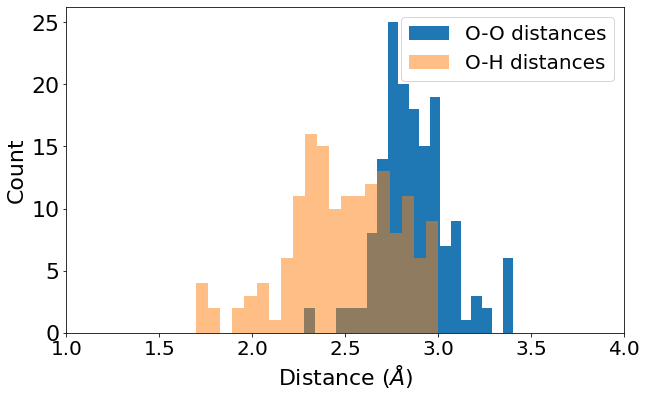

In [19]:
O_O_flat = flatten_list(master_O_O_array)
O_H_flat = flatten_list(master_O_H_array)

plt.figure(figsize=[10,6])
plt.hist(O_O_flat,bins=20, label='O-O distances')
plt.hist(O_H_flat,bins=20, alpha=0.5, label='O-H distances')
plt.legend(fontsize=20)
plt.xlabel(r'Distance ($\AA$)')
plt.xlim(1,4)
plt.ylabel('Count')
plt.savefig('MADI_distribution.png', dpi=300)
print('***For true O-H distance***')
print('33rd percentile = ', np.percentile(O_H_flat, 33))
print('66th percentile = ', np.percentile(O_H_flat, 66))
print('99th percentile = ', np.percentile(O_H_flat, 99))

In [22]:
np.save('files/O_O_master_array', O_O_flat)
np.save('files/O_H_master_array', O_H_flat)
finalgro2.to_pickle('files/hbond_analysis_3_20_22.pkl')

# Drop unnecessary columns

In [23]:
finalgro=pd.read_pickle('files/hbond_analysis_3_20_22.pkl')
finalgro=finalgro.drop(['HW1_x'], axis = 1)
finalgro =finalgro.drop(['y'], axis = 1)
finalgro = finalgro.drop(['z'], axis = 1)
finalgro = finalgro.drop(['tempfactor'], axis = 1)
finalgro = finalgro.drop(['occupancy'], axis = 1)
finalgro = finalgro.drop(['HW1_y'], axis = 1)
finalgro = finalgro.drop(['HW1_z'], axis = 1)
finalgro = finalgro.drop(['HW2_x'], axis = 1)
finalgro = finalgro.drop(['HW2_y'], axis = 1)
finalgro = finalgro.drop(['HW2_z'], axis = 1)
finalgro = finalgro.drop(['icode'], axis = 1)
finalgro = finalgro.drop(['altloc'], axis = 1)
finalgro = finalgro.drop(['element'], axis = 1)
finalgro = finalgro.drop(['charge'], axis = 1)
finalgro = finalgro.replace('NaN', 0)
finalgro = finalgro.replace(np.nan, 0)

# Filter

In [24]:
############Initialize columns which will contain final O-H information############
finalgro['ow_h1_partner_dist_fin'] = 0
finalgro['ow_h2_partner_dist_fin'] = 0
finalgro['waterID_h1_partner_fin'] = 0
finalgro['waterID_h2_partner_fin'] = 0
finalgro['o_o_dist_h1_partner_fin'] = 0
finalgro['o_o_dist_h2_partner_fin'] = 0



for f, rof in finalgro.iterrows():
    
    ############Grab all info about first element############
    res1 = finalgro.loc[f,'resseq']

    case1 = finalgro.loc[f,'chainid'].isupper()
    h1_dist1 = finalgro.loc[f,'ow_h1_partner_dist']
    h1_dist1 = h1_dist1.replace('[', '')
    h1_dist1 = h1_dist1.replace(']', '')
    h1_dist1  = h1_dist1.replace(" ", "")
    h1_dist1 = h1_dist1.split(',')
    
    h1_1 = finalgro.loc[f,'waterID_h1_partner']
    h1_1 = h1_1.replace('[', '')
    h1_1 = h1_1.replace(']', '')
    h1_1  = h1_1.replace(" ", "")
    h1_1 = h1_1.split(',')
    
    h2_1=finalgro.loc[f,'waterID_h2_partner']
    h2_1 = h2_1.replace('[', '')
    h2_1 = h2_1.replace(']', '')
    h2_1  = h2_1.replace(" ", "")
    h2_1 = h2_1.split(',')

    h2_dist1 = finalgro.loc[f,'ow_h2_partner_dist']
    h2_dist1 = h2_dist1.replace('[', '')
    h2_dist1 = h2_dist1.replace(']', '')
    h2_dist1  = h2_dist1.replace(" ", "")
    h2_dist1 = h2_dist1.split(',')
    
    O_Odist1 = finalgro.loc[f,'o_o_dist_h1_partner']
    O_Odist1 = O_Odist1.replace('[', '')
    O_Odist1 = O_Odist1.replace(']', '')
    O_Odist1  = O_Odist1.replace(" ", "")
    O_Odist1 = O_Odist1.split(',')
    
    O_Odist2 = finalgro.loc[f,'o_o_dist_h2_partner']
    O_Odist2 = O_Odist2.replace('[', '')
    O_Odist2 = O_Odist2.replace(']', '')
    O_Odist2 = O_Odist2.replace(" ", "")
    O_Odist2 = O_Odist2.split(',')
    

    ############################################################

    #############Convert O-H distances to array of floats and sort ##################
    try:
        h1_dist1 = [float(i) for i in h1_dist1]
    except ValueError:
        h1_dist1 =[]
    try:
        h2_dist1 = [float(i) for i in h2_dist1]
    except ValueError:
        h2_dist1 =[]
        
    h1_1 = [x for y, x in sorted(zip(h1_dist1, h1_1))]
    h2_1 = [x for _,x in sorted(zip(h2_dist1,h2_1))]
         
    O_Odist1 = [float(x) for _,x in sorted(zip(h1_dist1,O_Odist1))]
    O_Odist2 = [float(x) for _,x in sorted(zip(h2_dist1,O_Odist2))]
    
    h1_dist1 = [float(x) for _,x in sorted(zip(h1_dist1,h1_dist1))]
    h2_dist1 = [float(x) for _,x in sorted(zip(h2_dist1,h2_dist1))]
         
 ############Grab all info about second element############
    for z, rox in finalgro.iterrows():
     
        case2 =   finalgro.loc[z,'chainid'].isupper()
        
        if case1 !=case2: #If comparing two separate chains, skip. Only compare within same chain. 
            continue
            
        res2 = finalgro.loc[z,'resseq']

        h1_dist2 = finalgro.loc[z,'ow_h1_partner_dist']
        h1_dist2 = h1_dist2.replace('[', "")
        h1_dist2 = h1_dist2.replace(']', "")
        h1_dist2 = h1_dist2.replace(" ", "")
        h1_dist2 = h1_dist2.split(',')
    
        h2_dist2 = finalgro.loc[z,'ow_h2_partner_dist']
        h2_dist2 = h2_dist2.replace('[', "")
        h2_dist2 = h2_dist2.replace(']', "")
        h2_dist2 = h2_dist2.replace(" ", "")
        h2_dist2 = h2_dist2.split(',')
        
        h1_2 = finalgro.loc[z,'waterID_h1_partner']
        h1_2 = h1_2.replace('[', "")
        h1_2 = h1_2.replace(']', "")
        h1_2 = h1_2.replace(" ", "")
        h1_2 = h1_2.split(',')
        
        h2_2=finalgro.loc[z,'waterID_h2_partner']
        h2_2 = h2_2.replace('[', "")
        h2_2 = h2_2.replace(']', "")
        h2_2 = h2_2.replace(" ", "")
        h2_2 = h2_2.split(',')
    

        #############Convert O-H distances to array of floats and sort ##################
        try:
            h1_dist2 = [float(i) for i in h1_dist2]
        except ValueError:  #This error generally means that you have an empty array 
            h1_dist2=[]
        try:
            h2_dist2 = [float(i) for i in h2_dist2]
        except ValueError:
            h2_dist2=[] 
                 
        h1_2 = [x for y, x in sorted(zip(h1_dist2, h1_2))]
        h2_2 = [x for _,x in sorted(zip(h2_dist2,h2_2))]
       
        h1_dist2 = [float(x) for _,x in sorted(zip(h1_dist2,h1_dist2))]
        h2_dist2 = [float(x) for _,x in sorted(zip(h2_dist2,h2_dist2))]
        
        
        #############Take strongest bond from each case and see if there are duplicates#############
        ############# If there are duplicates, then find *true* direction of O-H bond  #############
        try:
            h1_dist1_ = h1_dist1[0]
            h1_1_=h1_1[0]
        except IndexError:
            h1_1_=0
            h1_dist1_  = 1000000
        
        try:
            h2_dist1_ = h2_dist1[0]
            h2_1_ = h2_1[0]
        except IndexError:
            h2_dist1_ = 1000000
            h2_1_ = 0
        
        try:
            h1_dist2_ = h1_dist2[0]
            h1_2_=h1_2[0]
        except IndexError:
            h1_dist2_ = 1000000  
            h1_2_ = 0
        
        try:
            h2_dist2_ = h2_dist2[0]
            h2_2_=h2_2[0]
        except IndexError:
            h2_dist2_ = 1000000 
            h2_2_ = 0
        
        try:
            h1_1_ = h1_1_.replace("'", "")
        except AttributeError:
            pass
        try:
            h2_1_ = h2_1_.replace("'", "")
        except AttributeError:
            pass
        try:
            h1_2_ = h1_2_.replace("'", "")
        except AttributeError:
            pass
            
        try:
            h2_2_ = h2_2_.replace("'", "")
        except AttributeError:
            pass
            
        if (str(res1) == str(h1_2_)) and (str(res2) == str(h1_1_)):

            distarray =[h1_dist1_, h1_dist2_]
            if h1_dist1_ == np.min(distarray): 
                try:
                    h1_2 = h1_2[1:]
                    h1_dist2 = h1_dist2[1:]

                except IndexError : 
                    h1_2 =[0]
                    h1_dist2 = [0]   


            elif h1_dist2_ == np.min(distarray): 
                try:
                    h1_1 = h1_1[1:]
                    h1_dist1 = h1_dist1[1:]                    
                  
                except IndexError : 
                    h1_1 = [0]
                    h1_dist1 = [0]                  

 
        if (str(res1) == str(h2_2_)) and (str(res2) == str(h2_1_)):
            distarray =[h2_dist1_, h2_dist2_]
            if h2_dist1_ == np.min(distarray): 
                try:
                    h2_2 = h2_2[1:]
                    h2_dist2 = h2_dist2[1:]    
                    
                except IndexError:
                    h2_2 = [0]
                    h2_dist2 = [0]   

            elif h2_dist2_ == np.min(distarray): 
                try:
                    h2_1 = h2_1[1:]
                    h2_dist1 = h2_dist1[1:]                   
                   
                except IndexError: 
                    h2_1 = [0]
                    h2_dist1 = [0]                    

        if (str(res1) == str(h2_2_)) and (str(res2) == str(h1_1_)):

            distarray =[h1_dist1_, h2_dist2_]
            if h1_dist1_ == np.min(distarray): 
                try:
                    h2_2 = h2_2[1:]
                    h2_dist2 = h2_dist2[1:] 

                except IndexError: 
                    h2_2 = [0]
                    h2_dist2= [0]       

                print('chain' + str(finalgro.loc[z,'chainid']) + ' ' + str(res1) + ' and  ' + str (h1_1_) + ' (h1) beat ' + str(res2) + ' and ' + str (h2_2_)+ '(h2)')
          
            elif h2_dist2_ == np.min(distarray): 
                try:
                    h1_1 = h1_1[1:]
                    h1_dist1 = h1_dist1[1:]                                   
                except IndexError: 
                    h1_1 = [0]
                    h1_dist1 = [0]                   
                print('chain' + str(finalgro.loc[z,'chainid']) + ' ' + str(res2) + ' and  ' + str (h2_2_) + ' (h2) beat ' + str(res1) + ' and ' + str (h1_1_)+ '(h1)')
                       
               
        if (str(res1) == str(h1_2_)) and (str(res2) == str(h2_1_)):

            distarray =[h2_dist1_, h1_dist2_]
            if h2_dist1_ == np.min(distarray): 
                try:
                    h1_dist2 = h1_2[1:]
                    h1_dist2 = h1_dist2[1:]  
                except IndexError: 
                    h1_dist2 = [0]
                    h1_dist2 =  [0] 

                    
                print('chain' + str(finalgro.loc[z,'chainid']) +  ' ' + str(res1) + ' and  ' + str (h2_1_) + ' (h2) beat '+ str(res2) + ' and ' + str (h1_2_)+ '(h1)')
           
            elif h1_dist2_ == np.min(distarray): 
                try:
                    h2_1 = h2_1[1:]
                    h2_dist1 = h2_dist1[1:]                                  
                except IndexError: 
                    h2_1 = [0]
                    h2_dist1 = [0]                    

                print('chain' + str(finalgro.loc[z,'chainid']) + ' ' + str(res2) + ' and  ' + str (h1_2_) + ' (h1) beat ' +str(res1) + ' and ' + str (h2_1_)+ '(h2)')
       
        ########################Finalizing O-H bonds########################
    
    if ((len(h2_1) ==0) and (len(h1_1)>0)):
     
        finalgro.loc[f,'waterID_h2_partner_fin'] = 0
        finalgro.loc[f,'ow_h2_partner_dist_fin'] = 0
        finalgro.loc[f,'o_o_dist_h2_partner_fin'] = 0

        finalgro.loc[f,'waterID_h1_partner_fin'] = [h1_1[0]]
        finalgro.loc[f,'ow_h1_partner_dist_fin'] = [h1_dist1[0]]
        finalgro.loc[f,'o_o_dist_h1_partner_fin'] = O_Odist1[0]


    elif ((len(h1_1) ==0) and (len(h2_1)>0)):

        finalgro.loc[f,'waterID_h2_partner_fin'] = [h2_1[0]]
        finalgro.loc[f,'ow_h2_partner_dist_fin'] = [h2_dist1[0]]
        finalgro.loc[f,'o_o_dist_h2_partner_fin'] = O_Odist2[0]

        finalgro.loc[f,'waterID_h1_partner_fin'] = 0
        finalgro.loc[f,'ow_h1_partner_dist_fin'] = 0
        finalgro.loc[f,'o_o_dist_h1_partner_fin'] =0
    ######If same ID is not registered for H1 and H2 , this is easy ######

    elif ( (len(h1_1) >0) and (len(h2_1)>0) and ((h2_1[0] != h1_1[0]) )):

        finalgro.loc[f,'waterID_h2_partner_fin'] = [h2_1[0]]
        finalgro.loc[f,'ow_h2_partner_dist_fin'] = [h2_dist1[0]]
        finalgro.loc[f,'o_o_dist_h2_partner_fin'] = O_Odist2[0]

        finalgro.loc[f,'waterID_h1_partner_fin'] = [h1_1[0]]
        finalgro.loc[f,'ow_h1_partner_dist_fin'] = [h1_dist1[0]]
        finalgro.loc[f,'o_o_dist_h1_partner_fin'] = O_Odist1[0]
        
    ######However, if H1 and H2 are same, do some checks######  

    else :  

        #If you have backup o-h2 bonds 
        if ((len(h1_dist1) == 1) and  (len(h1_dist1) < len(h2_dist1))):

            finalgro.loc[f,'waterID_h2_partner_fin'] = [h2_1[1]]
            finalgro.loc[f,'ow_h2_partner_dist_fin'] = [h2_dist1[1]]
            finalgro.loc[f,'o_o_dist_h2_partner_fin'] = O_Odist2[1]

            finalgro.loc[f,'waterID_h1_partner_fin'] = [h1_1[0]]
            finalgro.loc[f,'ow_h1_partner_dist_fin'] = [h1_dist1[0]]
            finalgro.loc[f,'o_o_dist_h1_partner_fin'] = O_Odist1[0]

        #If you have backup o-h1 bonds          
        elif ((len(h2_dist1) == 1) and len(h2_dist1) < len(h1_dist1)): 

            finalgro.loc[f,'waterID_h2_partner_fin'] = [h2_1[0]]
            finalgro.loc[f,'ow_h2_partner_dist_fin'] = [h2_dist1[0]]
            finalgro.loc[f,'o_o_dist_h2_partner_fin'] = O_Odist2[0]

            finalgro.loc[f,'waterID_h1_partner_fin'] = [h1_1[1]]
            finalgro.loc[f,'ow_h1_partner_dist_fin'] = [h1_dist1[1]]
            finalgro.loc[f,'o_o_dist_h1_partner_fin'] = O_Odist1[1]

        elif ( (len(h1_1) >0) and (len(h2_1)>0) and (h2_1[0] == h1_1[0])): 

            if h1_dist1[0] < h2_dist1[0]: 
                finalgro.loc[f,'waterID_h1_partner_fin'] = [h1_1[0]]
                finalgro.loc[f,'ow_h1_partner_dist_fin'] = [h1_dist1[0]]
                finalgro.loc[f,'o_o_dist_h1_partner_fin'] = O_Odist1[0]
                try:
                    finalgro.loc[f,'waterID_h2_partner_fin'] = [h2_1[1]]
                    finalgro.loc[f,'ow_h2_partner_dist_fin'] = [h2_dist1[1]]
                    finalgro.loc[f,'o_o_dist_h2_partner_fin'] = O_Odist2[1]
                        
                except IndexError:

                    finalgro.loc[f,'waterID_h2_partner_fin'] = 0
                    finalgro.loc[f,'ow_h2_partner_dist_fin'] = 0
                    finalgro.loc[f,'o_o_dist_h2_partner_fin'] = 0

            elif h2_dist1[0] < h1_dist1[0]: 
                finalgro.loc[f,'waterID_h2_partner_fin'] = [h2_1[0]]
                finalgro.loc[f,'ow_h2_partner_dist_fin'] = [h2_dist1[0]]
                finalgro.loc[f,'o_o_dist_h2_partner_fin'] = O_Odist2[0]
                try:
                    finalgro.loc[f,'waterID_h1_partner_fin'] = [h1_1[1]]
                    finalgro.loc[f,'ow_h1_partner_dist_fin'] = [h1_dist1[1]]
                    finalgro.loc[f,'o_o_dist_h1_partner_fin'] = O_Odist1[0]

                except IndexError: #If there are no backup options 
                    finalgro.loc[f,'waterID_h1_partner_fin'] = 0
                    finalgro.loc[f,'ow_h1_partner_dist_fin'] =0
                    finalgro.loc[f,'o_o_dist_h1_partner_fin'] = 0
 

chainG 30.0 and  29.0 (h2) beat 29.0 and 30.0(h1)
chainG 30.0 and  29.0 (h1) beat 29.0 and 30.0(h2)
chainG 30.0 and  29.0 (h1) beat 29.0 and 30.0(h2)
chainG 30.0 and  29.0 (h2) beat 29.0 and 30.0(h1)
chainG 60.0 and  59.0 (h2) beat 59.0 and 60.0(h1)
chainG 60.0 and  59.0 (h2) beat 59.0 and 60.0(h1)
chainG 130.0 and  69.0 (h1) beat 69.0 and 130.0(h2)
chainG 130.0 and  69.0 (h1) beat 69.0 and 130.0(h2)


In [25]:
for f, rof in finalgro.iterrows():
        
    ############Grab all info about first element############
    res1 = finalgro.loc[f,'resseq']
    case1 = finalgro.loc[f,'chainid'].isupper()
    h1_dist1 = finalgro.loc[f,'ow_h1_partner_dist_fin']
    h2_dist1 = finalgro.loc[f,'ow_h2_partner_dist_fin']
    
    h1_1 = finalgro.loc[f,'waterID_h1_partner_fin']
    h1_1 = str(h1_1)

    h2_1=finalgro.loc[f,'waterID_h2_partner_fin']
    h2_1=str(h2_1)

    O_Odist1 = finalgro.loc[f,'o_o_dist_h1_partner_fin']


    O_Odist2 = finalgro.loc[f,'o_o_dist_h2_partner_fin']

#  ############Grab all info about second element############
    for z, rox in finalgro.iterrows():

        case2 =   finalgro.loc[z,'chainid'].isupper()

        if case1 !=case2: #If comparing two separate chains, skip. Only compare within same chain. 
            continue

        res2 = finalgro.loc[z,'resseq']

        h1_dist2 = finalgro.loc[z,'ow_h1_partner_dist_fin']
        h2_dist2 = finalgro.loc[z,'ow_h2_partner_dist_fin']
        h1_2 = finalgro.loc[z,'waterID_h1_partner_fin']
        h2_2=finalgro.loc[z,'waterID_h2_partner_fin']
        h1_2 = str(h1_2)
        h2_2 = str(h2_2)
        
        h1_1 = h1_1.replace("'", "")
        h2_1 = h2_1.replace("'", "")
        h1_2 = h1_2.replace("'", "")
        h2_2 = h2_2.replace("'", "")


        ############# If there are duplicates, then find *true* direction of O-H bond  #############

        if (str(res1) == str(h1_2)) and (str(res2) == str(h1_1)):
     
            distarray =[h1_dist1, h1_dist2]
            if h1_dist1 == np.min(distarray): 

                finalgro.loc[z,'waterID_h1_partner_fin'] =0          

            elif h1_dist2 == np.min(distarray): 

                finalgro.loc[f,'waterID_h1_partner_fin'] =0  

        if (str(res1) == str(h2_2)) and (str(res2) == str(h2_1)):
   
            distarray =[h2_dist1, h2_dist2]
            if h2_dist1 == np.min(distarray): 

                finalgro.loc[z,'waterID_h2_partner_fin'] =0            

            elif h2_dist2 == np.min(distarray): 

                finalgro.loc[f,'waterID_h2_partner_fin'] =0  
        if (str(res1) == str(h2_2)) and (str(res2) == str(h1_1)):
   
            distarray =[h1_dist1, h2_dist2]
            if h1_dist1 == np.min(distarray): 

                finalgro.loc[z,'waterID_h2_partner_fin'] =0  

            elif h2_dist2 == np.min(distarray): 

                finalgro.loc[f,'waterID_h1_partner_fin'] =0 



        if (str(res1) == str(h1_2)) and (str(res2) == str(h2_1)):

            distarray =[h2_dist1, h1_dist2]
            if h2_dist1 == np.min(distarray): 

                finalgro.loc[z,'waterID_h1_partner_fin'] =0 


            elif h1_dist2 == np.min(distarray): 
                finalgro.loc[f,'waterID_h2_partner_fin'] =0 


In [26]:
finalgro.to_pickle('files/hbond_analysis_filtered.pkl')

In [27]:
finalgro=pd.read_pickle('files/hbond_analysis_filtered.pkl')
finalgro = finalgro.replace('NaN', 0)
finalgro = finalgro.replace(np.nan, 0)
finalgro.head()

,ATOM,serial,name,resname,chainid,resseq,x,OW_ID,OW_chain,HW1_ID,...,waterID_h2_partner,h2_partner_id,ow_h2_partner_dist,o_o_dist_h2_partner,ow_h1_partner_dist_fin,ow_h2_partner_dist_fin,waterID_h1_partner_fin,waterID_h2_partner_fin,o_o_dist_h1_partner_fin,o_o_dist_h2_partner_fin
402,ATOM,401.0,O,ASP,A,ASP_A_O_61,86.963,1226.0,X,0.0,...,[],[],[],[],1.973023,0.000000,48.0,0,2.729501,0.000000
405,ATOM,404.0,OD1,ASP,A,ASP_A_OD1_61,83.786,1663.0,X,0.0,...,"['OEC_A_W1_601', 21.0]","[2046.0, 2986.0]","[2.228366442037751, 2.5142342770712562]","[2.7185681893231894, 3.0072462486467613]",1.732258,2.228366,19.0,'OEC_A_W1_601',2.772784,2.718568
406,ATOM,405.0,OD2,ASP,A,ASP_A_OD2_61,82.152,1114.0,X,0.0,...,"[21.0, 40.0]","[2986.0, 3222.0]","[2.340896195904469, 1.7962076717350937]","[2.6707648717174686, 2.6299612164440784]",2.298870,1.796208,21.0,40.0,2.670765,2.629961
437,ATOM,436.0,OE1,GLU,A,GLU_A_OE1_65,79.521,3447.0,X,0.0,...,"[42.0, 119.0]","[2456.0, 3163.0]","[2.9737903423072716, 2.6725818977161344]","[3.188035915732443, 2.9155267105619225]",2.613382,2.973790,119.0,42.0,2.915527,3.188036
438,ATOM,437.0,OE2,GLU,A,GLU_A_OE2_65,78.862,0.0,0,0.0,...,[],[],[],[],0.000000,0.000000,0,0,0.000000,0.000000


# Very last filter:  Check for triple-donor 

In [28]:
from collections import Counter

a = np.array(finalgro[0:152]['waterID_h1_partner_fin'].values)
a_oh = np.array(finalgro[0:152]['ow_h1_partner_dist_fin'].values)
b = np.array(finalgro[0:152]['waterID_h2_partner_fin'].values)
b_oh = np.array(finalgro[0:152]['ow_h2_partner_dist_fin'].values)

master_array =[]
o_h_distances=[]
h_type=[]


for x in range(0,len(a)):
    master_array.append(a[x])
    o_h_distances.append(a_oh[x])
    h_type.append(1)
    
for y in range(0,len(b)):
    master_array.append(b[y])
    o_h_distances.append(b_oh[y])
    h_type.append(2)


for x in range(0,len(master_array)):
    dist_array=[]
    h_array=[]
    index_array=[]
    if master_array[x] ==0:
        continue 
    count = 1 
    dist_array.append(o_h_distances[x])
    h_array.append(h_type[x])
    index_array.append(x)
    for i in range(0,len(master_array)):
    
        try:
            if (float(master_array[x]) == float(master_array[i])) and (i!=x) : 
                count = count +1
                dist_array.append(o_h_distances[i])
                h_array.append(h_type[i])
                index_array.append(i)
        except ValueError: 
            if ((master_array[x]) == (master_array[i])) and (i!=x) : 
                count = count +1
                dist_array.append(o_h_distances[i])
                h_array.append(h_type[i])
                index_array.append(i)

    if count > 2:
        print('%d counts of %s' %(count, master_array[x]))

        dropindex_location= np.array(dist_array).argmax()
        dropindex=index_array[dropindex_location]
        drophtype = h_array[dropindex_location]

        if drophtype ==1:
            finalgro['waterID_h1_partner_fin'].iloc[dropindex]=0
        else:
            finalgro['waterID_h2_partner_fin'].iloc[dropindex-152]=0
            

    

3 counts of 19.0
3 counts of 19.0
3 counts of 19.0


/Users/yyk_lab/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
#This function is used when you have a double acceptor situation 
def plot_dub(z, p,chain):
    strength.append(finalgro['ow_h1_partner_dist_fin'].iloc[p])
    ax1.scatter(z,finalgro['ow_h1_partner_dist_fin'].iloc[p],s=100, color='blue',edgecolor='black')
    ax1.scatter(z,finalgro['o_o_dist_h1_partner_fin'].iloc[p] ,s=100,color='orange',edgecolor='black')
    ax2.plot(z, 1,color='white') 
    ticklabels1.append(finalgro['resseq'].iloc[p])
    ticklabels2.append(finalgro['waterID_h1_partner_fin'].iloc[p])
    prev1 = finalgro['waterID_h1_partner_fin'].iloc[p]
    z=z+1
    strength.append(finalgro['ow_h2_partner_dist_fin'].iloc[p])
    ax1.scatter(z,finalgro['ow_h2_partner_dist_fin'].iloc[p], s=100, edgecolor='black', color='blue')
    print('Double acceptor:', finalgro['resseq'].iloc[p])
    print('Partner IDs:',finalgro['waterID_h1_partner_fin'].iloc[p] ,  finalgro['waterID_h2_partner_fin'].iloc[p])
    print('***')
    ax1.scatter(z,finalgro['o_o_dist_h2_partner_fin'].iloc[p] ,s=100, edgecolor='black',color='orange')
    ax2.plot(z, 1,color='white') 
    ticklabels1.append(finalgro['resseq'].iloc[p])
    ticklabels2.append(finalgro['waterID_h2_partner_fin'].iloc[p])
    prev1 = finalgro['waterID_h2_partner_fin'].iloc[p]
    return z,prev1

# Select channel 

In [40]:
chain = 'G'
chan = 'Cl'

Double acceptor: ASP_A_OD1_61
Partner IDs: 19.0 'OEC_A_W1_601'
***
Double acceptor: ASP_A_OD2_61
Partner IDs: 21.0 40.0
***
Double acceptor: GLU_A_OE1_65
Partner IDs: 119.0 42.0
***
Double acceptor: SER_A_O_169
Partner IDs: 'OEC_A_W1_601' 62.0
***
Double acceptor: PRO_A_O_340
Partner IDs: 36.0 34.0
***
Double acceptor: OEC_A_O4_601
Partner IDs: 20.0 19.0
***
Double acceptor: 70.0
Partner IDs: 69.0 130.0
***
Double acceptor: 21.0
Partner IDs: 'LYS_D_NZ_317' 22.0
***
Double acceptor: 24.0
Partner IDs: 23.0 'OEC_A_W3_601'
***
Double acceptor: 62.0
Partner IDs: 61.0 24.0
***
Double acceptor: 117.0
Partner IDs: 122.0 121.0
***


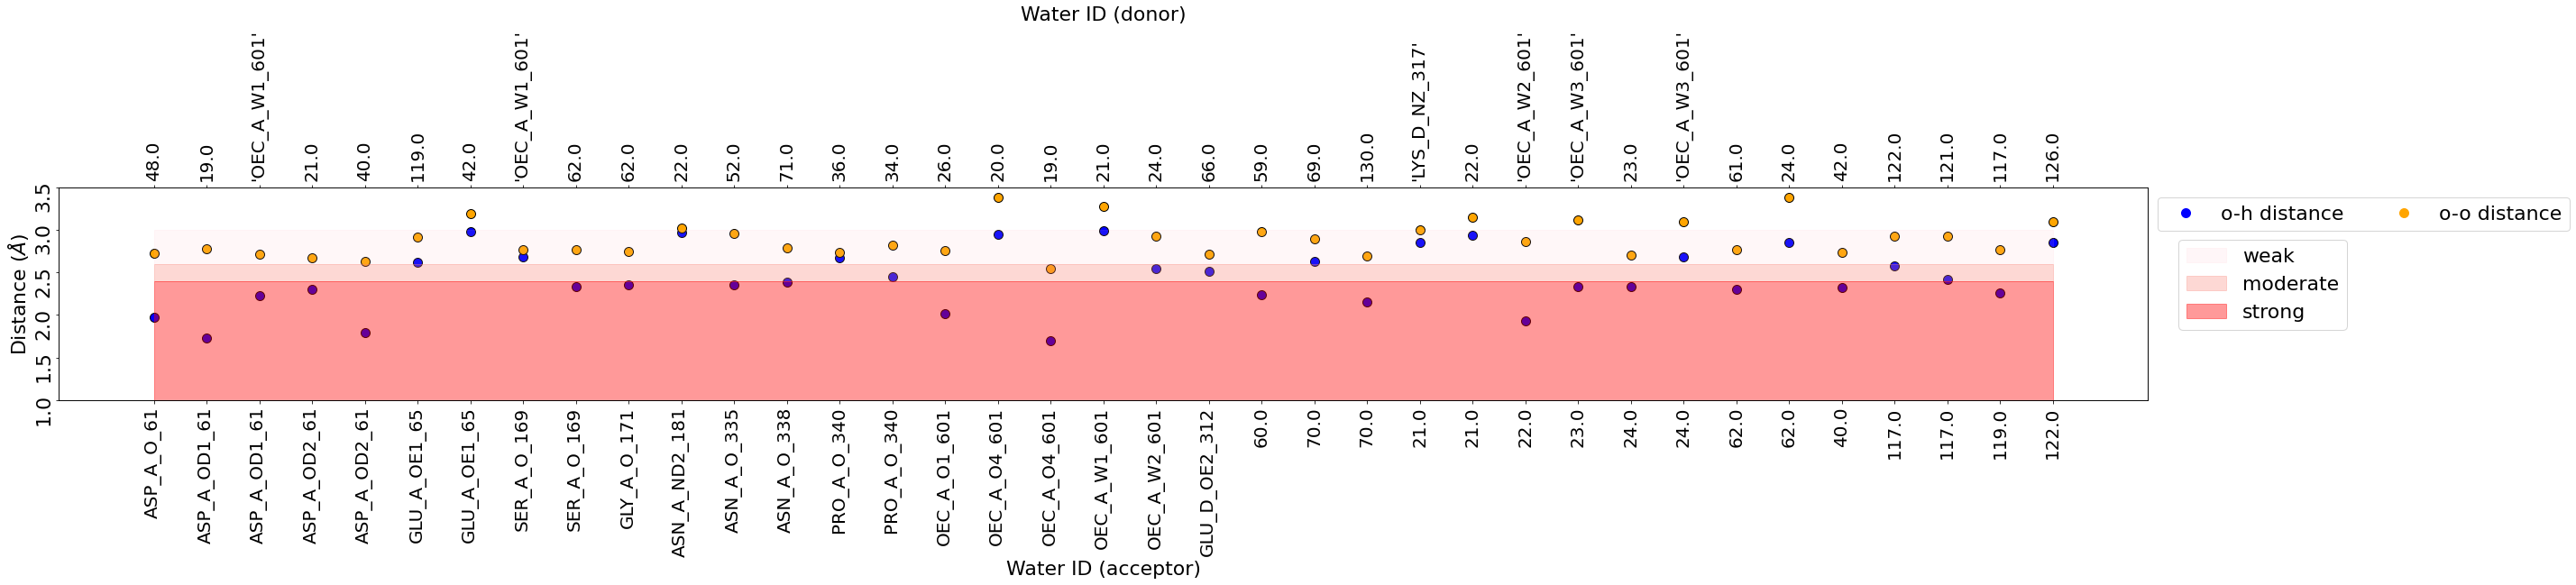

In [41]:
donor=[]
acceptor =[]
strength =[]

OW_peaks_involved = []
H1_peaks_involved = []
H2_peaks_involved = []

H1_partners_involved = []
H2_partners_involved = []

fig = plt.figure(figsize=(40, 5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Water ID (acceptor)')
ax2 = ax1.twiny()
ax2.set_xlabel('Water ID (donor)' )
ax2.xaxis.labelpad=10.0
ax1.set_ylabel(r'Distance $(\AA$)')

ticklabels2=[]
ticklabels1=[]
strength = []

if chan == 'O1':
    st =  ['ASP_A_O_61', 'ASP_A_CB_61', 'ASP_A_OD1_61', 'ASP_A_OD2_61', 'GLU_A_OE1_65' , 'GLU_A_OE2_65', 'SER_A_O_169', 'SER_A_OG_169', 'GLY_A_O_171','ASN_A_O_181','ASN_A_OD1_181','ASN_A_ND2_181','ARG_A_NH1_334','ARG_A_NH2_334','ASN_A_N_335','ASN_A_O_335','ASN_A_O_338','ASN_A_OD1_338','ASN_A_ND2_338','PRO_A_O_340','OEC_A_O1_601','OEC_A_O2_601','OEC_A_O3_601','OEC_A_O4_601','OEC_A_O5_601'           ,'OEC_A_W1_601','OEC_A_W2_601','OEC_A_W3_601','OEC_A_W4_601','SER_B_O_169','SER_B_OG_169','GLY_B_CA_333','ASN_C_O_155','ASN_C_OD1_155','ASN_C_ND2_155','GLY_C_O_171','GLY_C_CA_333','PRO_C_CG_334','PRO_C_CD_334','THR_C_OG1_335','THR_C_CG2_335','LEU_C_O_337','LYS_C_NZ_339','GLU_D_CG_312','GLU_D_OE1_312','GLU_D_OE2_312','LYS_D_NZ_317','ASN_D_O_338','ASN_D_OD1_338','ASN_D_ND2_338','ASN_D_O_350','ASN_D_OD1_350','ASN_D_ND2_350', 26,27,28, 29, 30, 31, 32, 33,  34, 35,36,37,38, 39, 76,77, 101, 102, 103, 104, 105, 106, 107, 108]

elif chan == 'Cl':
    st = [  'ASP_A_O_61', 'ASP_A_CB_61', 'ASP_A_OD1_61', 'ASP_A_OD2_61', 'GLU_A_OE1_65' , 'GLU_A_OE2_65', 'SER_A_O_169', 'SER_A_OG_169', 'GLY_A_O_171','ASN_A_O_181','ASN_A_OD1_181','ASN_A_ND2_181','ARG_A_NH1_334','ARG_A_NH2_334','ASN_A_N_335','ASN_A_O_335','ASN_A_O_338','ASN_A_OD1_338','ASN_A_ND2_338','PRO_A_O_340','OEC_A_O1_601','OEC_A_O2_601','OEC_A_O3_601','OEC_A_O4_601','OEC_A_O5_601'           ,'OEC_A_W1_601','OEC_A_W2_601','OEC_A_W3_601','OEC_A_W4_601','SER_B_O_169','SER_B_OG_169','GLY_B_CA_333','ASN_C_O_155','ASN_C_OD1_155','ASN_C_ND2_155','GLY_C_O_171','GLY_C_CA_333','PRO_C_CG_334','PRO_C_CD_334','THR_C_OG1_335','THR_C_CG2_335','LEU_C_O_337','LYS_C_NZ_339','GLU_D_CG_312','GLU_D_OE1_312','GLU_D_OE2_312','LYS_D_NZ_317','ASN_D_O_338','ASN_D_OD1_338','ASN_D_ND2_338','ASN_D_O_350','ASN_D_OD1_350','ASN_D_ND2_350', 59,60,66,67,68,69,70,21, 22,23,24,25,61,62,  40,  41, 42,  150,   117, 119, 121,122,150]

else:

    st=[ 'ASP_A_O_61', 'ASP_A_CB_61', 'ASP_A_OD1_61', 'ASP_A_OD2_61', 'SER_A_O_169', 'SER_A_OG_169', 'GLY_A_O_171','ASN_A_O_181','ASN_A_OD1_181','ASN_A_ND2_181','ARG_A_NH1_334','ARG_A_NH2_334','ASN_A_N_335','ASN_A_O_335','ASN_A_O_338','ASN_A_OD1_338','ASN_A_ND2_338','PRO_A_O_340','OEC_A_O1_601','OEC_A_O2_601','OEC_A_O3_601','OEC_A_O4_601','OEC_A_O5_601'           ,'OEC_A_W1_601','OEC_A_W2_601','OEC_A_W3_601','OEC_A_W4_601','SER_B_O_169','SER_B_OG_169','GLY_B_CA_333','ASN_C_O_155','ASN_C_OD1_155','ASN_C_ND2_155','GLY_C_O_171','GLY_C_CA_333','PRO_C_CG_334','PRO_C_CD_334','THR_C_OG1_335','THR_C_CG2_335','LEU_C_O_337','LYS_C_NZ_339','GLU_D_CG_312','GLU_D_OE1_312','GLU_D_OE2_312','LYS_D_NZ_317','ASN_D_O_338','ASN_D_OD1_338','ASN_D_ND2_338','ASN_D_O_350','ASN_D_OD1_350','ASN_D_ND2_350', 19,20,48,49, 50, 51, 52, 53, 71, 72, 73]

if chain == 'G':
    offset = 0
else:
    offset = 147
    
haystack= list((finalgro['resseq'][offset:offset+147]).values)


o1_b =[]
for x in st:
    if x in haystack:
        o1_b.append((haystack.index(x)+offset))
z=0
prev1=0
prev2 = 0 

for p in o1_b:
    # Skip if no h partners

    if (finalgro['waterID_h2_partner_fin'].iloc[p] ==0 and finalgro['waterID_h1_partner_fin'].iloc[p] ==0 ):
      
        continue
    #Skip if no oxygen
    if finalgro['OW_ID'].iloc[p]==0:
        continue
    OW_peaks_involved.append(finalgro['OW_ID'].iloc[p])
    
    H1_peaks_involved.append(finalgro['HW1_ID'].iloc[p])
    H2_peaks_involved.append(finalgro['HW2_ID'].iloc[p])  


    if (finalgro['waterID_h1_partner_fin'].iloc[p] == finalgro['waterID_h2_partner_fin'].iloc[p]) and finalgro['ow_h1_partner_dist_fin'].iloc[p] < finalgro['ow_h2_partner_dist'].iloc[p]:
        strength.append(finalgro['ow_h1_partner_dist_fin'].iloc[p])
       
        ax1.scatter(z,finalgro['ow_h1_partner_dist_fin'].iloc[p],s=100, color='blue',edgecolor='black',label ='O-H1 distance')
        ax1.scatter(z,finalgro['o_o_dist_h1_partner_fin'].iloc[p] ,s=100,color='orange',edgecolor='black', label ='O-O distance')
        ax2.plot(z, 1,color='white') 
        ticklabels1.append(finalgro['resseq'].iloc[p])
        ticklabels2.append(finalgro['waterID_h1_partner_fin'].iloc[p])
        
        prev1 = finalgro['waterID_h1_partner_fin'].iloc[p]
    elif (finalgro['waterID_h1_partner'].iloc[p] == finalgro['waterID_h2_partner_fin'].iloc[p]) and finalgro['ow_h2_partner_dist_fin'].iloc[p] < finalgro['ow_h1_partner_dist'].iloc[p]:
        strength.append(finalgro['ow_h2_partner_dist_fin'].iloc[p])
        ax1.scatter(z,finalgro['ow_h2_partner_dist_fin'].iloc[p],s=100, color='blue',edgecolor='black',label ='O-H1 distance')
        ax1.scatter(z,finalgro['o_o_dist_h2_partner_fin'].iloc[p] ,s=100,color='orange',edgecolor='black', label ='O-O distance')
        ax2.plot(z, 1,color='white') 
        ticklabels1.append(finalgro['resseq'].iloc[p])
        ticklabels2.append(finalgro['waterID_h2_partner_fin'].iloc[p])
        prev1 = finalgro['waterID_h2_partner_fin'].iloc[p]
    
    elif (finalgro['waterID_h2_partner_fin'].iloc[p]==0): 
        strength.append(finalgro['ow_h1_partner_dist_fin'].iloc[p])
        ax1.scatter(z,finalgro['ow_h1_partner_dist_fin'].iloc[p],s=100, color='blue',edgecolor='black',label ='O-H1 distance')
        ax1.scatter(z,finalgro['o_o_dist_h1_partner_fin'].iloc[p] ,s=100,color='orange',edgecolor='black', label ='O-O distance')
        ax2.plot(z, 1,color='white') 
        ticklabels1.append(finalgro['resseq'].iloc[p])
        ticklabels2.append(finalgro['waterID_h1_partner_fin'].iloc[p])
        prev1 = finalgro['waterID_h1_partner_fin'].iloc[p]
    elif (finalgro['waterID_h1_partner_fin'].iloc[p]==0): 
        strength.append(finalgro['ow_h2_partner_dist_fin'].iloc[p])
        ax1.scatter(z,finalgro['ow_h2_partner_dist_fin'].iloc[p],s=100, color='blue',edgecolor='black',label ='O-H1 distance')
        ax1.scatter(z,finalgro['o_o_dist_h2_partner_fin'].iloc[p] ,s=100,color='orange',edgecolor='black', label ='O-O distance')
        ax2.plot(z, 1,color='white') 
        ticklabels1.append(finalgro['resseq'].iloc[p])
        ticklabels2.append(finalgro['waterID_h2_partner_fin'].iloc[p])
        prev1 = finalgro['waterID_h2_partner_fin'].iloc[p]
    else:
        z,prev1 = plot_dub(z,p,chain)
    
    H2_partners_involved.append(finalgro['waterID_h2_partner_fin'].iloc[p])
    H1_partners_involved.append(finalgro['waterID_h1_partner_fin'].iloc[p])   
    
    z=z+1
    


ax1.set_xticks(np.arange(0,len(ticklabels2),1))
ax2.set_xticks(np.arange(0,len(ticklabels2),1))
ax2.set_xticklabels(np.array(ticklabels2))
ax1.set_xticklabels(np.array(ticklabels1))

donor.append(ticklabels2)
acceptor.append(ticklabels1)
ax1.fill_between(np.arange(0,len(ticklabels2),1), 2.6, 3, color='lightpink',alpha=0.1, label ='weak')
ax1.fill_between(np.arange(0,len(ticklabels2),1), 2.4, 2.6, color='salmon',alpha = 0.3, label='moderate')
ax1.fill_between(np.arange(0,len(ticklabels2),1), 0, 2.4, color='red', alpha = 0.4, label='strong')

a = mpatches.Patch(color='lightpink', alpha = 0.1,  label ='weak')
b= mpatches.Patch(color='salmon', alpha = 0.3,  label='moderate')
c= mpatches.Patch(color='red', alpha = 0.4,  label='strong')
d= mpatches.Patch(color='blue',  label='o-h distance')
e= mpatches.Patch(color='orange',  label='o-o distance')

ax2.legend(handles=[a,b,c], bbox_to_anchor=(1.1, 0.8))

colors = ["b", "orange"]
texts = ["o-h distance", "o-o distance"]
patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
ax1.legend(handles=patches, bbox_to_anchor=(1, 1), 
           loc='upper left', ncol=2,  numpoints=1)
ax1.set_ylim(1,3.5)
ax1.set_ylim(1,3.5)
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
plt.tight_layout()
ax1.tick_params(labelrotation=90)
ax2.tick_params(labelrotation=90)
if chain =='G':
    label ='firstchain'
else:
    label='secondchain'
plt.savefig('files/%s_hbond_%s_twoH.png' %(chan, label),  bbox_inches='tight',dpi=100)

# Generating arrows in pymol

In [42]:
df = pd.DataFrame()
df['donor'] = donor[0]
df['acceptor'] = acceptor[0]
df['strength'] = strength

df.to_pickle('files/%s_%s_donor_acceptor_strength_pickle' %(chan, label))
example=pd.read_pickle('files/%s_%s_donor_acceptor_strength_pickle' %(chan, label))


    
for z in range(0,len(donor[0])):
    if strength[z] <= 2.4:
        color= 'red1'
    elif strength[z] > 2.4 and strength[z] <= 2.6 :
        color='red2'
    elif strength[z] > 2.6 and strength[z] <= 3 :
        color='red3'
    try:
        float(example.loc[z,'donor']) #First assume you are only dealing with chain G waters
        don = 'resn OOO and chain %s and resi %d' %(chain,float(example.loc[z,'donor']))
    except ValueError:
        new_name = example['donor'][z].split('_')
        don = 'resn %s and chain %s and name %s and resi %s' %(new_name[0], new_name[1], new_name[2], new_name[3])
    
            
    try:
        float(example.loc[z,'acceptor'])
        acc = 'resn OOO and chain %s and resi %d' %(chain,float(example.loc[z,'acceptor']))
    except ValueError:
        new_name = example['acceptor'][z].split('_')
        acc = 'resn %s and chain %s and name %s and resi %s' %(new_name[0], new_name[1], new_name[2], new_name[3])

    don = don.replace("'", '')  
    acc = acc.replace("'", '') 


    print('cgo_arrow %s, %s,  color=%s, radius= 0.2, hlength=0.4, hradius=0.4, gap = 0.6' %(don, acc,color))


cgo_arrow resn OOO and chain G and resi 48, resn ASP and chain A and name O and resi 61,  color=red1, radius= 0.2, hlength=0.4, hradius=0.4, gap = 0.6
cgo_arrow resn OOO and chain G and resi 19, resn ASP and chain A and name OD1 and resi 61,  color=red1, radius= 0.2, hlength=0.4, hradius=0.4, gap = 0.6
cgo_arrow resn OEC and chain A and name W1 and resi 601, resn ASP and chain A and name OD1 and resi 61,  color=red1, radius= 0.2, hlength=0.4, hradius=0.4, gap = 0.6
cgo_arrow resn OOO and chain G and resi 21, resn ASP and chain A and name OD2 and resi 61,  color=red1, radius= 0.2, hlength=0.4, hradius=0.4, gap = 0.6
cgo_arrow resn OOO and chain G and resi 40, resn ASP and chain A and name OD2 and resi 61,  color=red1, radius= 0.2, hlength=0.4, hradius=0.4, gap = 0.6
cgo_arrow resn OOO and chain G and resi 119, resn GLU and chain A and name OE1 and resi 65,  color=red3, radius= 0.2, hlength=0.4, hradius=0.4, gap = 0.6
cgo_arrow resn OOO and chain G and resi 42, resn GLU and chain A and n

# For showing MADI peaks

In [43]:
a = 0
for z in OW_peaks_involved:
    if z ==0:
        continue
    else:
        print('show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`%d/O' %(z))

for z in H1_peaks_involved:
    if z ==0:
        continue
    else:
        print('show sphere, /peaks_H1_8_29_2022_abs_final//X/HOH`%d/O' %(z))
                
                
for z in H2_peaks_involved:
    if z ==0:
        continue
    else:
        print('show sphere, /peaks_H2_8_29_2022_abs_final//X/HOH`%d/O' %(z))

        
    
for z in H1_partners_involved:
    if z ==0:
        continue
    else:
        try:
            float(z)
            
            ow = finalgro[finalgro['resseq'] == float(z)]
            h1 = finalgro[finalgro['resseq'] == float(z)]
            h2 = finalgro[finalgro['resseq'] == float(z)]
            
            if len(ow) > 0:
                print('show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`%d/O' %(ow.iloc[0]['OW_ID']))
            
            if len(h1) > 0:
                print('show sphere, /peaks_H1_8_29_2022_abs_final//X/HOH`%d/O' %(h1.iloc[0]['HW1_ID']))
            
            if len(h2) > 0:
                print('show sphere, /peaks_H2_8_29_2022_abs_final//X/HOH`%d/O' %(h2.iloc[0]['HW2_ID']))
            
        except ValueError: 
   
            ow = finalgro[finalgro['resseq'] == z.replace("'", '')]
            h1 = finalgro[finalgro['resseq'] == z.replace("'", '')]
            h2 = finalgro[finalgro['resseq'] == z.replace("'", '')]

            if len(ow) > 0:
                print('show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`%d/O' %(ow.iloc[0]['OW_ID']))
            
            if len(h1) > 0:
                print('show sphere, /peaks_H1_8_29_2022_abs_final//X/HOH`%d/O' %(h1.iloc[0]['HW1_ID']))
            
            if len(h2) > 0:
                print('show sphere, /peaks_H2_8_29_2022_abs_final//X/HOH`%d/O' %(h2.iloc[0]['HW2_ID']))
            else:
                continue
                
                
for z in H2_partners_involved:
    if z ==0:
        continue
    else:
        try:
            float(z)
            
            ow = finalgro[finalgro['resseq'] == float(z)]
            h1 = finalgro[finalgro['resseq'] == float(z)]
            h2 = finalgro[finalgro['resseq'] == float(z)]
            
            if len(ow) > 0:
                print('show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`%d/O' %(ow.iloc[0]['OW_ID']))
            
            if len(h1) > 0:
                print('show sphere, /peaks_H1_8_29_2022_abs_final//X/HOH`%d/O' %(h1.iloc[0]['HW1_ID']))
            
            if len(h2) > 0:
                print('show sphere, /peaks_H2_8_29_2022_abs_final//X/HOH`%d/O' %(h2.iloc[0]['HW2_ID']))
            
        except ValueError: 

   
            ow = finalgro[finalgro['resseq'] == z.replace("'", '') ]
            h1 = finalgro[finalgro['resseq'] == z.replace("'", '')]
            h2 = finalgro[finalgro['resseq'] == z.replace("'", '')]

            if len(ow) > 0:
                print('show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`%d/O' %(ow.iloc[0]['OW_ID']))
            
            if len(h1) > 0:
                print('show sphere, /peaks_H1_8_29_2022_abs_final//X/HOH`%d/O' %(h1.iloc[0]['HW1_ID']))
            
            if len(h2) > 0:
                print('show sphere, /peaks_H2_8_29_2022_abs_final//X/HOH`%d/O' %(h2.iloc[0]['HW2_ID']))
            else:
                continue

show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`1226/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`1663/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`1114/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`3447/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`2078/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`2163/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`8307/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`172/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`1553/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`44/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`11/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`497/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`783/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`3798/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`3287/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`8408/O
show sphere, /peaks_OW_8_29_2022_abs_final//X/HOH`4648/O
show sphere, /peaks_OW_8_29_2022_abs_f